In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('continuous_ged.csv')
#'Induced Edit Cost Sinkhorn Lower' = 1 if 'Induced Edit Cost Sinkhorn' < 'Induced Edit Cost Hungarian'; = -1 if 'Induced Edit Cost Sinkhorn' > 'Induced Edit Cost Hungarian'; =0 if 'Induced Edit Cost Sinkhorn' == 'Induced Edit Cost Hungarian'

In [ ]:
col = sns.color_palette("mako")

In [ ]:
dff = df[df['alpha'] > 1 ]
dff.head(-10)

,Matching Cost Hungarian,Matching Cost Sinkhorn,Matching Cost Sinkhorn Projection,Induced Edit Cost Hungarian,Induced Edit Cost Sinkhorn,Diversion Matching Cost Sinkhorn,Diversion Matching Cost Sinkhorn Projection,Error Induced Edit Cost,Entropy Sinkhorn Assignment,Mean Runtime Hungarian,Runtime Sinkhorn,Runtime Sinkhorn Projection,alpha,beta,Dataset,Mean Runtime Sinkhorn,Induced Edit Cost Sinkhorn Lower
0,2.0,11.216871,2.0,2.0,2.0,3.072290,0.000000,0.000000,10.120436,0.000006,0.008626,0.008970,2.0,2.0,Acyclic,0.001543,0
1,7.0,15.608168,7.0,10.0,9.0,1.076021,0.000000,-0.090909,12.835828,0.000006,0.000227,0.000247,2.0,2.0,Acyclic,0.001543,1
2,5.0,14.791974,5.0,8.0,7.0,1.631996,0.000000,-0.111111,12.839331,0.000006,0.000218,0.000234,2.0,2.0,Acyclic,0.001543,1
3,10.0,19.184215,10.0,13.0,12.0,0.834929,0.000000,-0.071429,15.697062,0.000006,0.000215,0.000231,2.0,2.0,Acyclic,0.001543,1
4,10.0,19.184215,10.0,13.0,12.0,0.834929,0.000000,-0.071429,15.697062,0.000006,0.000214,0.000229,2.0,2.0,Acyclic,0.001543,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916460,21.0,21.000193,22.5,87.0,85.0,0.000009,0.068182,-0.022727,255.030693,0.000226,0.004209,0.004338,95.0,95.0,RNA,0.002051,1
4916461,27.5,25.941674,27.5,87.0,97.0,-0.054678,0.000000,0.113636,245.756314,0.000226,0.004607,0.004713,95.0,95.0,RNA,0.002051,-1
4916462,509.5,507.225872,509.5,643.0,643.0,-0.004455,0.000000,0.000000,923.606765,0.000226,0.004852,0.005483,95.0,95.0,RNA,0.002051,0
4916463,10.5,10.460603,10.5,67.0,72.0,-0.003426,0.000000,0.073529,237.159621,0.000226,0.004002,0.004114,95.0,95.0,RNA,0.002051,-1


In [ ]:
#Je kleiner, desto öfter ist Sinkhorn besser als Hungarian
def upper_bound_sinkhorn_better(dataset_name, without_alpha_is_one):
  if dataset_name=='all':
    df_dataset = df
  else:
    df_dataset = df[df['Dataset']==dataset_name]

  if without_alpha_is_one == True:
    df_dataset = df_dataset[df_dataset['alpha']>1]

  alpha = list(set(df_dataset['alpha']))
  beta = list(set(df_dataset['beta']))

  pair = []
  rel_error_upper_bound_per_pair = []
  count_upper_bound_sinkhorn_higher_per_pair = []
  sinkhorn_better_sum_ec = []
  sinkhorn_better_count_ec = []
  hungarian_better_count_ec = []
  sinkhorn_matching_cost_smaller_0 = []
  sinkhorn_better_sum_mc = []
  sinkhorn_better_count_mc = []
  x = []
  y = []
  sinkhorn_better = []

  from matplotlib.colors import ListedColormap
  cmap = ListedColormap([[0.5800230680507498, 0.8189004229142637, 0.7502806612841215], [0.21697808535178778, 0.3273356401384083, 0.3694117647058824]])

  for m in alpha:
    for p in beta:
      _df = df_dataset[df_dataset['alpha']==m]
      __df = _df[_df['beta']==p]
      liste_count = list(__df['Induced Edit Cost Sinkhorn Lower'])
      kleiner_null = len(__df[__df['Diversion Matching Cost Sinkhorn']<0])
      groesser_null = len(__df[__df['Diversion Matching Cost Sinkhorn']>0])

      sb = 0
      hb = 0
      for i in range(len(liste_count)):
        if liste_count[i]==1:
          sb += 1
        if liste_count[i]==-1:
          hb +=1

      summe_sinkhorn_ec = sum(__df['Induced Edit Cost Sinkhorn'])
      summe_hungarian_ec = sum(__df['Induced Edit Cost Hungarian'])
      summe_sinkhorn_mc = sum(__df['Matching Cost Sinkhorn'])
      summe_hungarian_mc = sum(__df['Matching Cost Hungarian'])


      if summe_sinkhorn_ec < summe_hungarian_ec:
        sinkhorn_better_sum_ec.append(1)
      if summe_sinkhorn_ec > summe_hungarian_ec:
        sinkhorn_better_sum_ec.append(0)

      if sb > hb:
        sinkhorn_better_count_ec.append(1)
      if sb < hb:
        sinkhorn_better_count_ec.append(0)

      if summe_sinkhorn_mc < summe_hungarian_mc:
        sinkhorn_better_sum_mc.append(1)
      if summe_sinkhorn_mc > summe_hungarian_mc:
        sinkhorn_better_sum_mc.append(0)

      if kleiner_null > groesser_null:
        sinkhorn_better_count_mc.append(1)
      if kleiner_null < groesser_null:
        sinkhorn_better_count_mc.append(0)

      pair.append((m,p))
      #rel_error_upper_bound_per_pair.append(summe)

  for i in range(len(pair)):
    x.append(pair[i][0])
    y.append(pair[i][1])

  return x, y, sinkhorn_better_count_ec, cmap

In [ ]:
sns.set(font_scale=1.5)
sns.set_theme(style='white')

In [ ]:
x, y, sinkhorn_better_count_ec, cmap = upper_bound_sinkhorn_better('all', without_alpha_is_one=True)

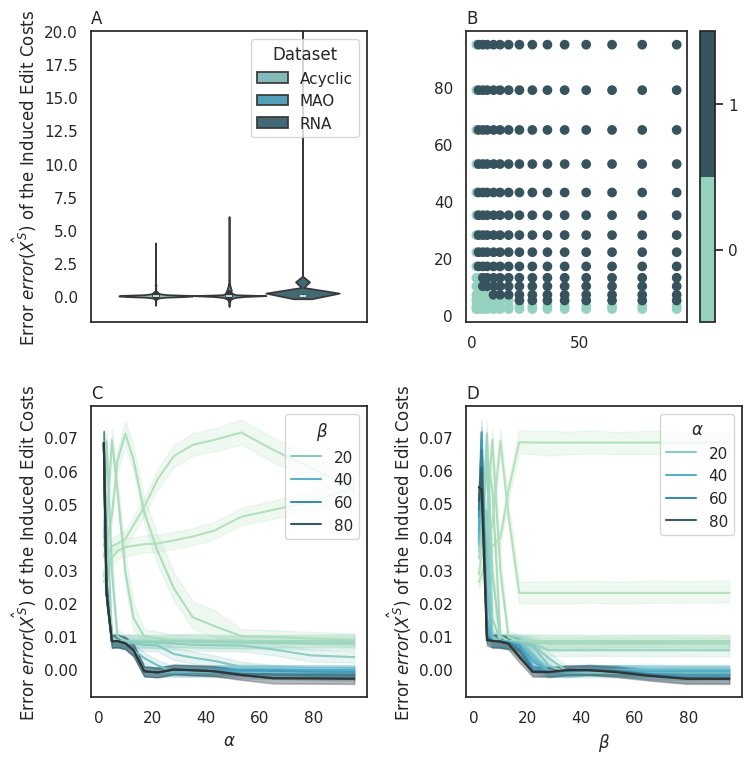

In [67]:
#induced edit cost plot
mosaic = [['violin','points'],['alpha','beta']]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(4*2, 4*2), sharex=False, sharey=False)
fig.tight_layout(pad = 3.0)

#violin
axs['violin'].set_ylim(ymin = -2, ymax=20)
sns.violinplot(data=dff, y="Error Induced Edit Cost", hue = 'Dataset', palette = 'GnBu_d', cut=0, ax=axs['violin']).set_title('A', loc = "left")
axs['violin'].set_ylabel('Error $error(\hat{X^S})$ of the Induced Edit Costs')

#points
axs['points'].set_title('B', loc='left')
cax = axs['points'].scatter(x, y, c = sinkhorn_better_count_ec, cmap=cmap)
cb = fig.colorbar(cax, ticks=[0.25,0.75])
cb.set_ticklabels([0,1])

#alpha
sns.lineplot(x = 'alpha', y = "Error Induced Edit Cost", hue="beta", data = dff, palette = 'GnBu_d',ax=axs['alpha']).set_title('C', loc = "left")
axs['alpha'].set_ylabel('Error $error(\hat{X^S})$ of the Induced Edit Costs')
axs['alpha'].set_xlabel(r'$\alpha$')
axs['alpha'].legend(title=r'$\beta$', loc='upper right')

#beta
sns.lineplot(x = 'beta', y = "Error Induced Edit Cost", hue="alpha", data = dff, palette = 'GnBu_d',ax=axs['beta']).set_title('D', loc = "left")
axs['beta'].set_ylabel('Error $error(\hat{X^S})$ of the Induced Edit Costs')
axs['beta'].set_xlabel(r'$\beta$')
axs['beta'].legend(title=r'$\alpha$', loc='upper right')

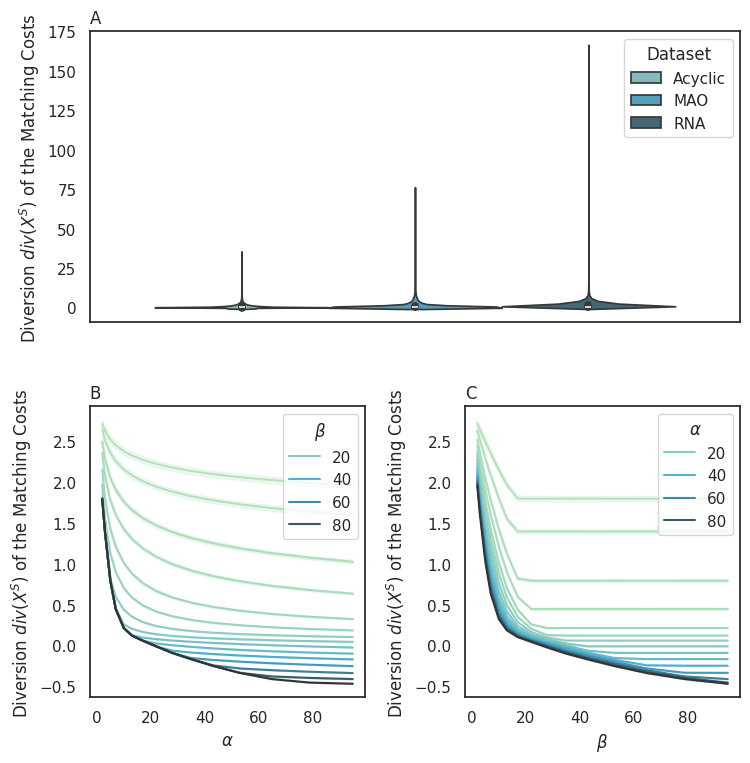

In [63]:
#diversion sinkhorn plot
mosaic = [['violin','violin'],['alpha','beta']]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(4*2, 4*2),sharex=False, sharey=False)
fig.tight_layout(pad = 3.0)

#violin
#axs['violin'].set_ylim(ymin = -2, ymax=50)
sns.violinplot(data=dff, y="Diversion Matching Cost Sinkhorn", hue = 'Dataset', palette = 'GnBu_d', cut=0, ax=axs['violin']).set_title('A', loc = "left")
axs['violin'].set_ylabel('Diversion $div(X^S)$ of the Matching Costs')

#alpha
sns.lineplot(x = 'alpha', y = "Diversion Matching Cost Sinkhorn", hue="beta", data = dff, palette = 'GnBu_d',ax=axs['alpha']).set_title('B', loc = "left")
axs['alpha'].set_ylabel('Diversion $div(X^S)$ of the Matching Costs')
axs['alpha'].set_xlabel(r'$\alpha$')
axs['alpha'].legend(title=r'$\beta$')

#beta
sns.lineplot(x = 'beta', y = "Diversion Matching Cost Sinkhorn", hue="alpha", data = dff, palette = 'GnBu_d',ax=axs['beta']).set_title('C', loc = "left")
axs['beta'].set_ylabel('Diversion $div(X^S)$ of the Matching Costs')
axs['beta'].set_xlabel(r'$\beta$')
axs['beta'].legend(title=r'$\alpha$')

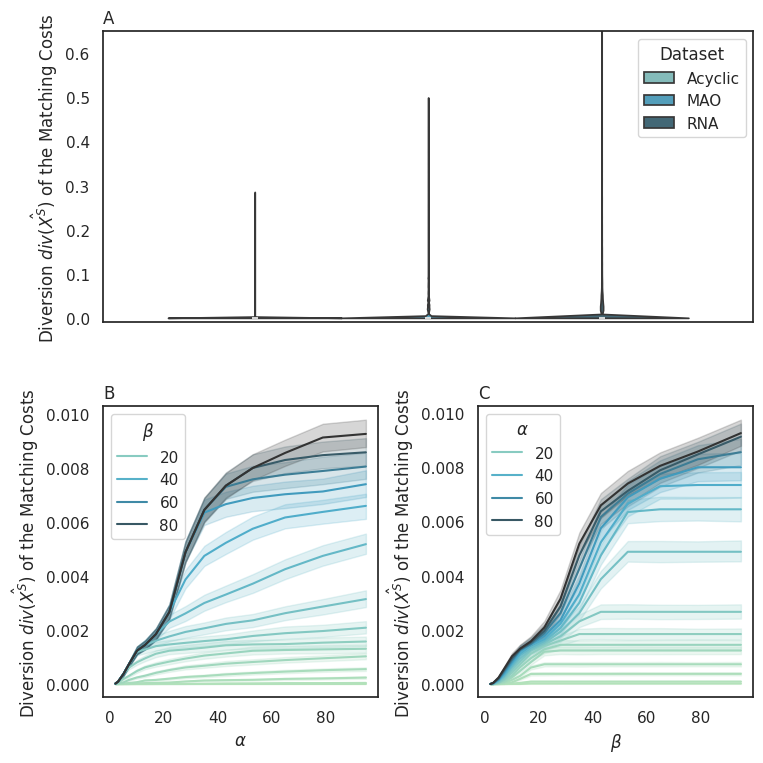

In [66]:
#diversion sinkhorn projection plot
mosaic = [['violin','violin'],['alpha','beta']]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(4*2, 4*2),sharex=False, sharey=False)
fig.tight_layout(pad = 3.0)

#violin
axs['violin'].set_ylim(ymin = -0.01, ymax=0.65)
sns.violinplot(data=dff, y="Diversion Matching Cost Sinkhorn Projection", hue = 'Dataset', palette = 'GnBu_d', cut=0, ax=axs['violin']).set_title('A', loc = "left")
axs['violin'].set_ylabel('Diversion $div(\hat{X^S})$ of the Matching Costs')

#alpha
sns.lineplot(x = 'alpha', y = "Diversion Matching Cost Sinkhorn Projection", hue="beta", data = dff, palette = 'GnBu_d',ax=axs['alpha']).set_title('B', loc = "left")
axs['alpha'].set_ylabel('Diversion $div(\hat{X^S})$ of the Matching Costs')
axs['alpha'].set_xlabel(r'$\alpha$')
axs['alpha'].legend(title=r'$\beta$')

#beta
sns.lineplot(x = 'beta', y = "Diversion Matching Cost Sinkhorn Projection", hue="alpha", data = dff, palette = 'GnBu_d',ax=axs['beta']).set_title('C', loc = "left")
axs['beta'].set_ylabel('Diversion $div(\hat{X^S})$ of the Matching Costs')
axs['beta'].set_xlabel(r'$\beta$')
axs['beta'].legend(title=r'$\alpha$')

Text(0.5, 10.249999999999995, '$\\beta$')

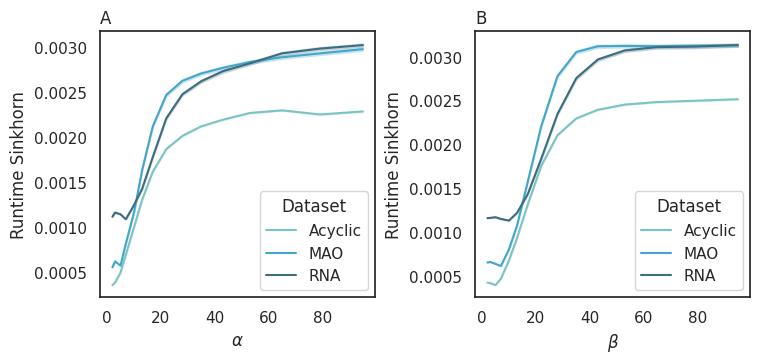

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(pad = 3.0)

sns.lineplot(x="alpha",y="Runtime Sinkhorn", data=dff, hue = 'Dataset', palette = 'GnBu_d', ax = axes[0]).set_title('A', loc = "left")
sns.lineplot(x="beta",y="Runtime Sinkhorn", data=dff, hue = 'Dataset', palette = 'GnBu_d', ax = axes[1]).set_title('B', loc = "left")

axes[0].set_xlabel(r'$\alpha$')
axes[1].set_xlabel(r'$\beta$')

In [ ]:
import torch
import itertools
import numpy as np

def from_cost_to_sim_exp(C, alpha, beta):
  n, m = C.shape
  ones_m = torch.ones((1, m))
  ones_n = torch.ones((n, 1))
  minL, _ = C.min(dim=1)
  minL[-1] = 0.0
  Cp = C-(minL.view(n, 1)@ones_m)
  T = min(alpha, beta*torch.log(torch.tensor(alpha))/torch.max(Cp)) #*
  print("Cp max: ", torch.max(Cp))
  minC, _ = Cp.min(dim=0)
  minC[-1] = 0.0
  Cp = Cp-ones_n@minC.view(1, m)
  Cp = Cp/torch.max(Cp)
  S = torch.exp(-T*Cp)
  return S

In [44]:
cost_sim_df = pd.read_csv('from_cost_to_sim_df.csv')

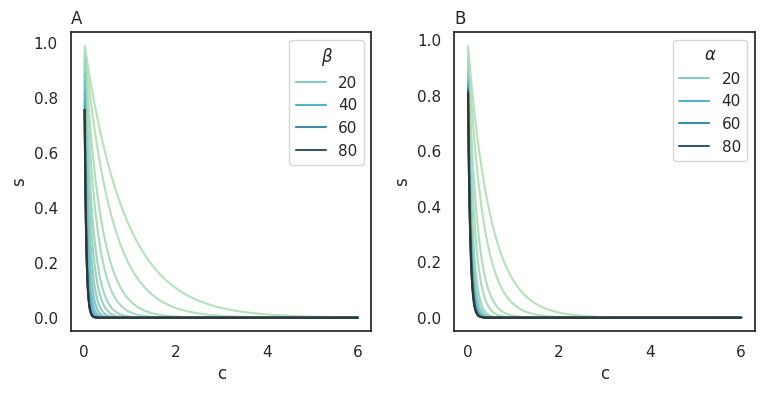

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(pad = 2.0)

sns.lineplot(x = "c", y = "s", hue="beta", data = cost_sim_df[cost_sim_df['alpha'] == 28 ], palette = 'GnBu_d',ax=axes[0]).set_title('A', loc = "left")
sns.lineplot(x = "c", y = "s", hue="alpha", data = cost_sim_df[cost_sim_df['beta'] == 28 ], palette = 'GnBu_d',ax=axes[1]).set_title('B', loc = "left")

axes[0].legend(title=r'$\beta$')
axes[1].legend(title=r'$\alpha$')